<h1><center>Práctica 5</center></h1>
<h2><center>Segmentación de Imagen (II) </center></h2>

El objetivo de esta práctica es familiarizar al alumno con las técnicas de extracción de características a fin de abordar un problema de segmentación utilizando aprendizaje no supervisado, en concreto el algoritmo k-medias. Para ello se trabajará con la imagen en color ‘cormoran.jpg’, que acompaña al material de esta práctica.  
 

In this exercise we will be using some methods of feature extraction to aid in the segmentation using unsupervised machine learning, specifically the algorithm k-means. We will be using the image 'cormoran.jpg'.

In [1]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

import texturefilters as tf

I. Análisis visual de la imagen 
 
Lea en MATLAB la imagen ‘cormoran.jpg’ proporcionada como material adjunto en la práctica y almacénela en la variable I. Examine visualmente la imagen (representada en la Figura 1) y responda a las siguientes preguntas: 
- ¿qué objetos considera claramente discriminativos en la imagen? 
- a simple vista, ¿qué características considera discriminativas? 


1. Visual analysis of the image

Read and display the image 'cormoran.jpg'. What are the three distinct objects in the image? What characteristic best differentiates them?

<IPython.core.display.Javascript object>


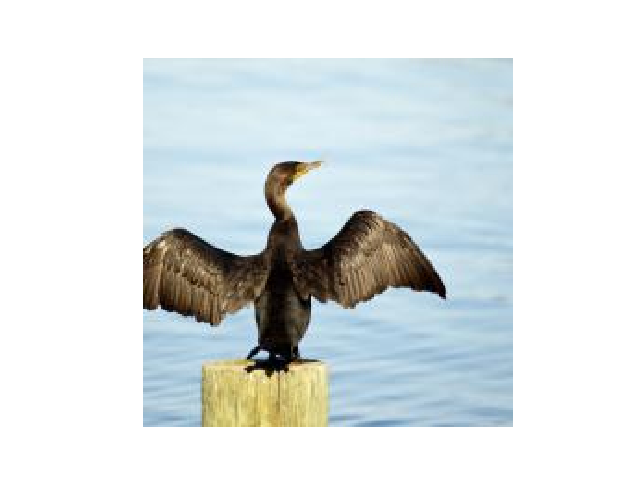

In [2]:
I = cv2.imread('cormoran_rgb.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)


%matplotlib notebook
plt.figure(1)
plt.imshow(I)
plt.axis('off')
plt.show()

Convierta la imagen a escala de grises (variable I_gris) y analice visualmente su histograma. ¿Cree que podría realizar la segmentación mediante umbralización múltiple? Justifique su respuesta. 

Turn the image into gray scale and display its histogram? Could you use thresholding to separate the different objects in the image?

<IPython.core.display.Javascript object>


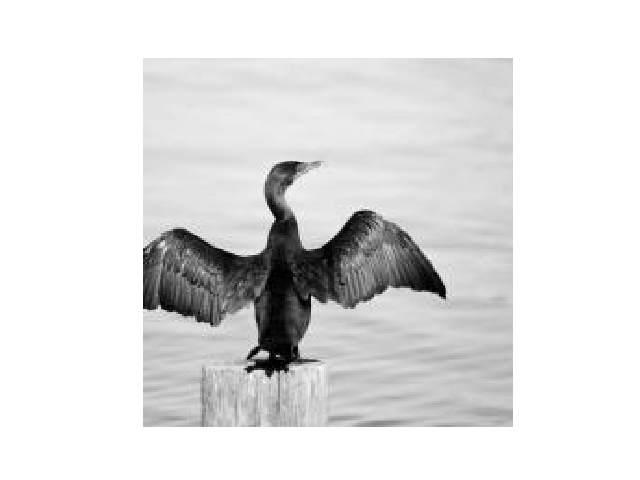

<IPython.core.display.Javascript object>


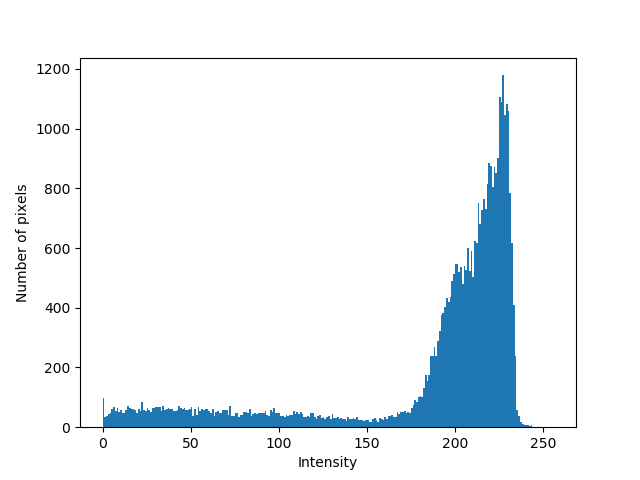

In [3]:
Igray = cv2.imread('cormoran_rgb.jpg', 0)

%matplotlib notebook
plt.figure(2)
plt.imshow(Igray, cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure('Histogram')
plt.hist(Igray.ravel(),256,[0,256]); 
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()

II. Características RGB y algoritmo k-medias 
 Inicialmente abordaremos el problema de segmentación considerando como características los niveles de intensidad de las componentes R, G y B de la imagen original I. Para ello: 
 - Extraiga cada componente de color de la imagen I. 

2. RGB characteristics and k-means

In this section we will try to use the different color components of the RGB image as characteristics for segmentation.

    -First split the channels of the image

In [4]:
I_R,I_G,I_B = cv2.split(I)


- Convierta cada componente en un vector columna utilizando el comando reshape. Así, por ejemplo, para almacenar como vector columna los niveles de intensidad de los píxeles de la componente R de I, utilizaremos la siguiente secuencia de instrucciones
I_R = I(:,:,1);
[nrows, ncols] = size(I_R); 
I_R_res = reshape(I_R,nrows*ncols,1); 

- Turn each channel into a vector of size (nrows*ncols, 1) using the function [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).


In [5]:
nrows, ncols = I_B.shape

I_B_res = np.reshape(I_B, (nrows*ncols,1))
I_R_res = np.reshape(I_R, (nrows*ncols,1))
I_G_res = np.reshape(I_G, (nrows*ncols,1))
print(I_G_res.shape)


(40000, 1)


- Represente el scatter plot de los datos utilizando la función plot3(haga uso del comando help para conocer su sintaxis). ¿Observa grupos de puntos claramente diferenciados?

- Display in a 3d scatter plot all the data from the 3 vectors, can you see any distict group?

[Here](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) is the documentation on 2d scatter plot. 


<IPython.core.display.Javascript object>


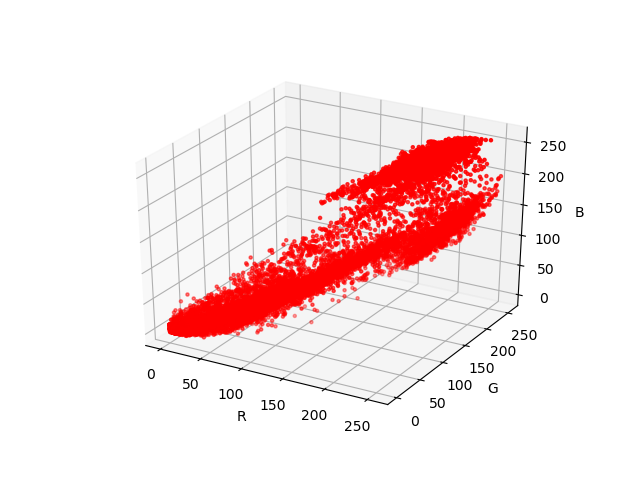

In [6]:
fig = plt.figure('scatter plot')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(I_R_res, I_G_res, I_B_res, c='r', marker='.')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

Sobre el espacio de tres dimensiones representado en la figura anterior aplicaremos el
algoritmo de agrupamiento k-medias con k=3. Utilizaremos para ello la función kmeans del
siguiente modo
ngrupos = 3;
rgb_res = double([I_R_res I_G_res I_B_res]);
[cluster_idx cluster_center] =
kmeans(rgb_res,ngrupos,'distance','sqEuclidean','Replicates',10);

Las entradas a la función kmeans son:

(1) conjunto de ejemplos/observaciones (matriz rgb_res, donde cada ejemplo es una fila y cada columna representa una característica),

(2)medida de similitud (cuadrado de la distancia Euclídea en nuestro caso, indicado a través del parámetro 'distance'),

y (3) número de inicializaciones (utilice el valor 10 en esta práctica, indicado con el parámetro 'Replicates').

El algoritmo kmeans devuelve la posición de los centroides (variable cluster_center) y una etiqueta identificativa del cluster al que pertenece cada punto de entrada (variable cluster_idx). Puesto que el algoritmo se realiza 10 veces con distintas  inicializaciones, la salida proporcionada corresponde a la realización para la que se obtiene la mínima suma de distancias intracluster.

Para observar el resultado del algoritmo k-medias, puede representar sobre el scatter plot
anterior los centroides resultantes del siguiente modo:
 plot3(cluster_center(:,1), cluster_center(:,2), cluster_center(:,3),'sr');
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
https://cmdlinetips.com/2018/04/how-to-concatenate-arrays-in-numpy/

The space we displayed in the las segment is where we will apply [k-means](https://team.inria.fr/steep/files/2015/03/tp51.pdf). Since we have three objects we will use k = 3, that means we will have 3 randomized centroids.

To implement this algorithm we will be using [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from sklearn.cluster, it should be in the cell with the imported libraries. We will be using the method fit_predict which asigns a label to each pixel according to the cluster assigned to them.

Fisrt concatenate the three vectors of the different components, you should get a matriz of size (nrows* ncols, 3). We will be using two commands to make it easier, the code should look like this:

<code>Python
kmeans = KMeans()
prediction = kmeans.fit_predict()
</code>

In KMeans leave every value as its default except the number of clusters. The input for fit_predict should be the matrix with the concatenated vectors.

Now we will display scatter plot from last section adding the centroids in their positions after applying the algorithm. To acces the positions of the cluster centers use the method kmeans.cluster_centers, the output of this method is an array with the coordinates of each center. 

<code>Python
First_cluster = kmeans.cluster_centers_[:, 0]
</code>

In the scatter plot paint the dots representing the centers a different color and make them bigger so they are easier to spot.

(40000, 3)
[[196.33704909 219.53322811 230.63865049]
 [ 60.17733122  46.75286445  32.76590869]
 [177.88023493 162.98033708 113.75229826]]


<IPython.core.display.Javascript object>


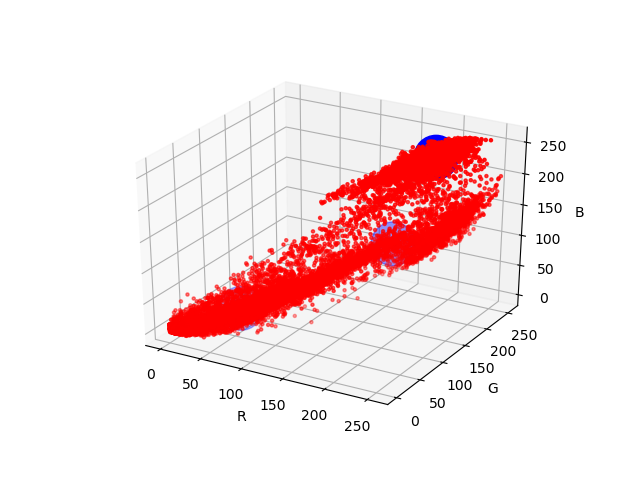

In [7]:
I_res = np.concatenate((I_R_res,I_G_res, I_B_res),axis=1)
print(I_res.shape)


kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(I_res)
print(kmeans.cluster_centers_)

fig = plt.figure('scatter plot +kmeans')
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(I_R_res, I_G_res, I_B_res, c='r', marker='.')

ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')

ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=1000, c='blue')
plt.show()

El resultado de la segmentación se puede observar en el espacio imagen generando una
imagen en falso color a partir del identificador de cluster asociado a cada observación
(píxel). Para ello, debe transformar el vector con la identificación del cluster al que
pertenece cada píxel en una matriz de las mismas dimensiones que la imagen original. Puede
hacer uso del siguiente código.

pixel_labels_rgb = reshape(cluster_idx,nrows,ncols);

I_segm = label2rgb(pixel_labels_rgb);

figure, imshow(I_segm)

¿Considera que el resultado de la segmentación es el deseado?, ¿es posible afirmar que se
produce sobresegmentación? Justifique razonadamente sus respuestas.

To see the actual segmentation of the image we will use the method kmeans.labels_, this creates a vectors size (nrows* ncols, 1) with the number of the cluster assigned to each pixel in the image. To display it as an image in false color (as we did in the last exercise with the labeled image) we have to return this vector to the original shape of the image.

Now display this labeled image, no colormap necessary.

(40000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


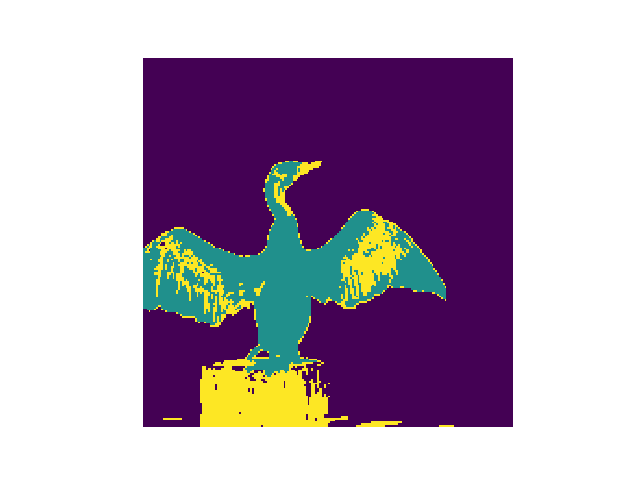

In [8]:
eti =kmeans.labels_
print(eti.shape)

pixel_labels = np.reshape(eti, (nrows, ncols))
print(pixel_labels)

%matplotlib notebook
plt.figure('I labeled')
plt.imshow(pixel_labels)
plt.axis('off')
plt.show()

III. Características cromáticas ab
Como sabe, en el espacio RGB la información cromática está distribuida en las tres
componentes (R, G y B). En esta sección realizaremos una transformación del espacio de
representación para separar las componentes cromáticas y acromáticas de la imagen, de
modo que aplicaremos el algoritmo k-medias únicamente sobre el espacio de componentes
cromáticas. La transformación considerada es la transformación Lab, transformación que
implementa la función rgb2lab proporcionada como material adjunto a la práctica.
Realice la transformación de la imagen original (espacio RGB) al espacio Lab y extraiga
únicamente las componentes cromáticas (componentes ab). Represente el scatter plot
correspondiente e intente identificar visualmente a qué color corresponden las nubes de
puntos.
[lab_imL, l_L, a_L, b_L] = rgb2lab(I);
a_res = reshape(a_L,nrows*ncols,1);
b_res = reshape(b_L,nrows*ncols,1);
figure, plot(a_res, b_res,'.')
xlabel('a'), ylabel('b')

3. ab chromatic characteristics

In RGB the color information is distributed along the three components, in other color representations this is not the case, the chromatic and achromatic information are separate. For this section we will be using the [Lab](https://www.xrite.com/blog/lab-color-space) space where the L represents the achromatic information (lightnes) and ab the chromatic information. We will be applying kmean over the chromatic components. 

First use cvtcolor to change color space (cv2.COLOR_RGB2LAB). Now like we did previously with the RGB components split them and reshape the ab components into two vectors of shape (nrows* ncols, 1). Display this two vectors as a 2d scatterplot.

<IPython.core.display.Javascript object>


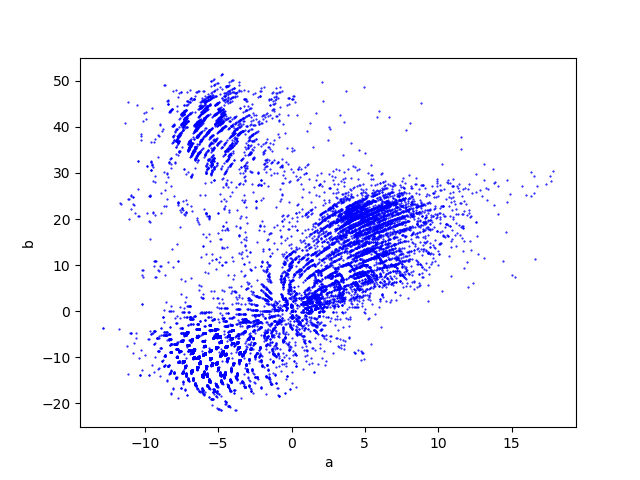

In [9]:
from skimage import color

Lab_Im = color.rgb2lab(I)
L_l,L_a,L_b = cv2.split(Lab_Im)

L_a_res = np.reshape(L_a, (nrows*ncols,1))
L_b_res = np.reshape(L_b, (nrows*ncols,1))

plt.figure('ab scatter')
plt.scatter(L_a_res, L_b_res, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Aplique ahora el algoritmo k-medias sobre el nuevo espacio de características y represente la
capa de etiquetas de la imagen segmentada. Comente las diferencias con la segmentación
obtenida en el Apartado II.
Represente la posición de los centroides en el scatter plot correspondiente y responda a las
siguientes preguntas:
- ¿cuál es la desviación típica (comando std de MATLAB) asociada a la componente a
obtenida a partir de I?
- ¿cuál es la desviación típica asociada a la componente b obtenida a partir de I?
- ¿cree que alguna de las dos componentes tiene más influencia al determinar la posición
de los centroides con el algoritmo k-medias?, ¿por qué?

Apply kmeans over this new space, display the scatterplot with the new clusters and the segmented image. Can you appreciate any difference between the segmentation in this segement and the segmentation in segment 2? Does any of the components (ab) have more weight in the position of the centroids?

[[-5.12776941 -8.10696033]
 [ 4.34196117 15.29356062]
 [-5.10112622 38.91790388]]


<IPython.core.display.Javascript object>


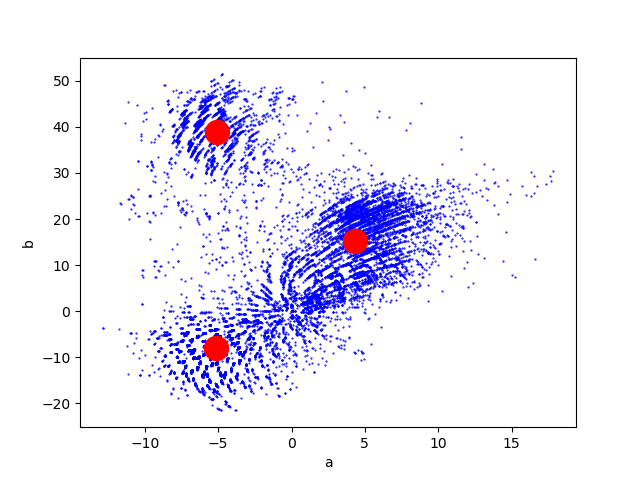

In [10]:
ab_res =np.concatenate((L_a_res, L_b_res), axis=1)


kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans2.fit_predict(ab_res)
print(kmeans2.cluster_centers_)


plt.figure('ab scatter +kmeans')
plt.scatter(L_a_res, L_b_res, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


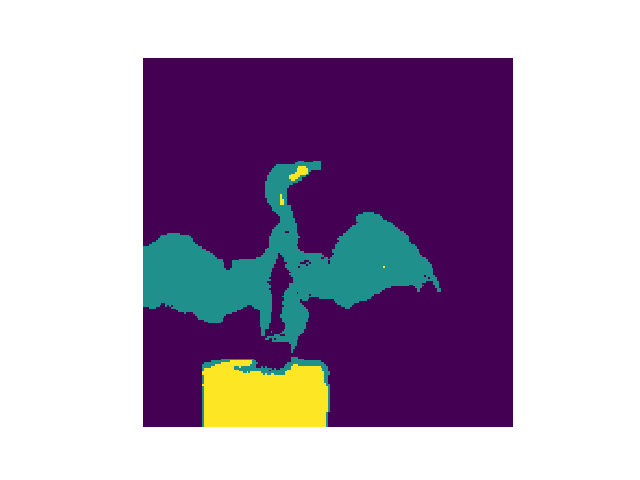

In [11]:
eti_ab =kmeans2.labels_
print(eti_ab.shape)

pixel_labels_ab = np.reshape(eti_ab, (nrows, ncols))
print(pixel_labels_ab)

%matplotlib notebook
plt.figure('ab labeled')
plt.imshow(pixel_labels_ab)
plt.axis('off')
plt.show()

Para que no haya una componente que domine en el cálculo de distancias del algoritmo kmedias únicamente porque su rango dinámico es mayor, se propone normalizar cada
componente del espacio ab para que tenga media nula y desviación típica uno. La matriz de
ejemplos con características normalizadas se asignará a la variable ab_norm (cada fila es un
ejemplo y cada columna es una característica). Explique cómo se realiza la normalización si
la secuencia de instrucciones es la siguiente:
ab_res = [a_res b_res];

ndim = size(ab_res,2);

ab_norm = ab_res;

for ind_dim=1:ndim

    datos = ab_res(:,ind_dim);
    datos_norm = (datos-mean(datos))/std(datos);
    ab_norm(:,ind_dim)=datos_norm;
end

To stop one component from weighting when calculating the distances beacuse of its wider range we are going to normalize the components. This new matrx will be called ab_norm. Look at the given code and try to understand the process of normalization:

<code>ab_res =np.concatenate((L_a_res, L_b_res), axis=1)

[x, ndim]= ab_res.shape
ab_norm = ab_res
ab_norm = ab_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = ab_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    ab_norm[:,ind] = datos_norm   
    
L_a_norm = ab_norm[:, 0]
L_b_norm = ab_norm[:, 1]
</code>

Once you understand the process copy it changing the variable names for your own.

<IPython.core.display.Javascript object>


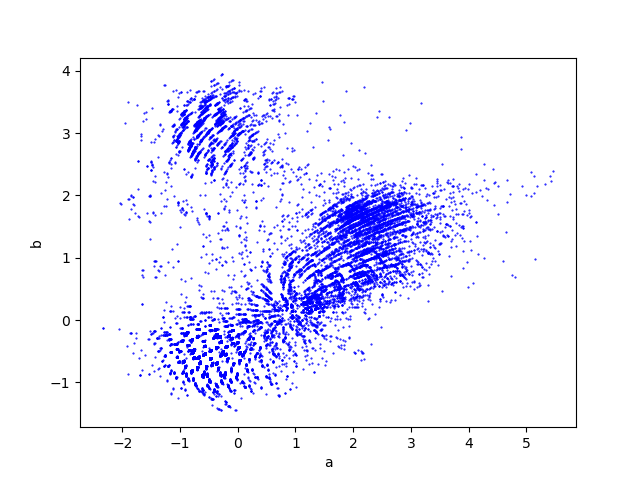

In [12]:
ab_res =np.concatenate((L_a_res, L_b_res), axis=1)

[x, ndim]= ab_res.shape
ab_norm = ab_res
ab_norm = ab_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = ab_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    ab_norm[:,ind] = datos_norm
    
L_a_norm = ab_norm[:, 0]
L_b_norm = ab_norm[:, 1]

plt.figure('ab scatter norm')
plt.scatter(L_a_norm, L_b_norm, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Aplique ahora el algoritmo k-medias sobre el nuevo espacio de características y represente la capa de etiquetas de la imagen segmentada. Comente las diferencias con la segmentación obtenida en el Apartado II. 
 Represente la posición de los centroides en el scatter plot correspondiente y responda a las siguientes preguntas: - ¿cuál es la desviación típica (comando std de MATLAB) asociada a la componente a obtenida a partir de I?  - ¿cuál es la desviación típica asociada a la componente b obtenida a partir de I? - ¿cree que alguna de las dos componentes tiene más influencia al determinar la posición de los centroides con el algoritmo k-medias?, ¿por qué

Apply kmeans over this new space y display the labelled image. Can you see any difference between this and the last time we applied kmeans?

[[ 2.03648819  1.15826104]
 [-0.41193538 -0.46437773]
 [-0.42531801  2.9579793 ]]


<IPython.core.display.Javascript object>


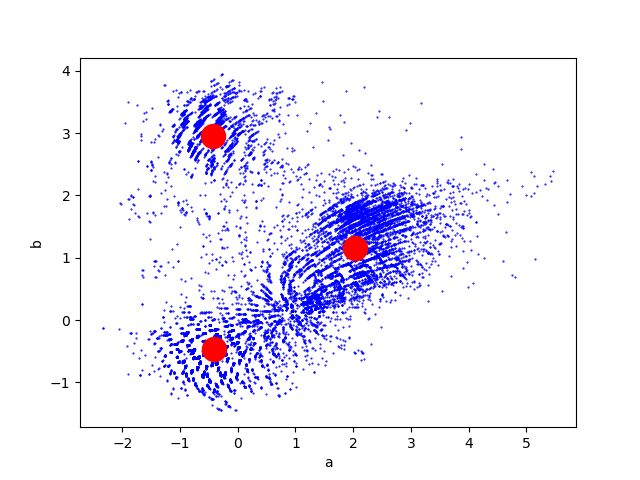

In [13]:
kmeansnorm = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_norm = kmeansnorm.fit_predict(ab_norm)
print(kmeansnorm.cluster_centers_)


plt.figure('ab_norm scatter +kmeans')
plt.scatter(L_a_norm, L_b_norm, c='blue', s= 1, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(kmeansnorm.cluster_centers_[:, 0], kmeansnorm.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


<IPython.core.display.Javascript object>


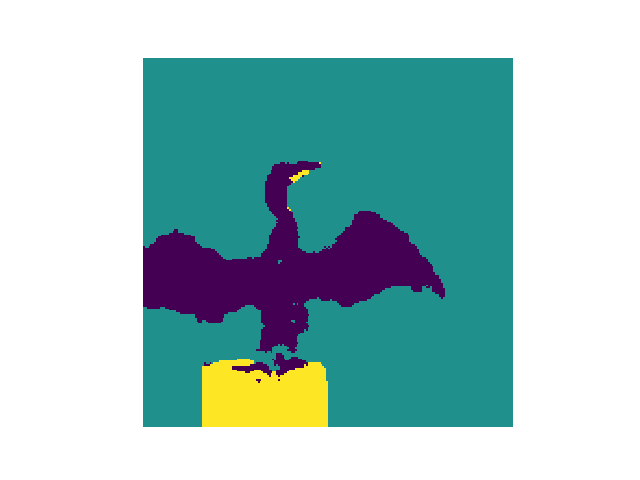

In [14]:
eti_ab_norm =kmeansnorm.labels_
print(eti_ab_norm.shape)

pixel_labels_ab_norm = np.reshape(eti_ab_norm, (nrows, ncols))
print(pixel_labels_ab_norm)

%matplotlib notebook
plt.figure('ab_norm labeled')
plt.imshow(pixel_labels_ab_norm)
plt.axis('off')
plt.show()

IV. Características de textura

MATLAB proporciona una serie de filtros para extraer características relacionadas con la textura. La salida de cada filtro es una imagen del mismo tamaño que la imagen original donde cada píxel contiene la característica de textura extraída en un entorno local del mismo. Consulte la ayuda de las funciones stdfilt, entropyfilt y rangefilt de MATLAB e indique qué descriptor estadístico se obtiene con cada una de las tres funciones.

STDFILT

https://stackoverflow.com/questions/7331105/stdfilt-in-opencv/40027378#40027378

YES

<IPython.core.display.Javascript object>


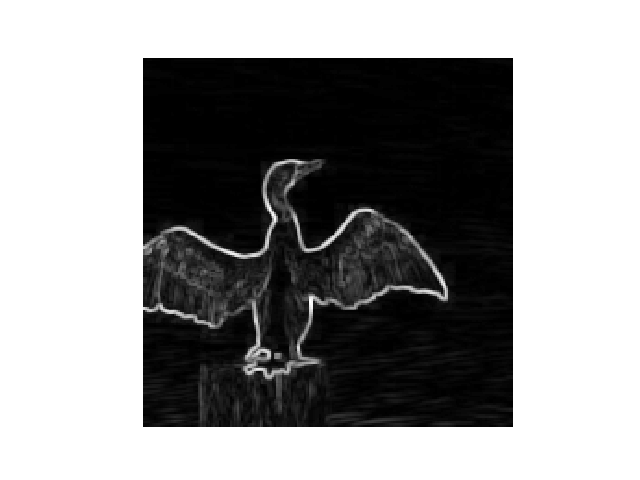

In [15]:
J = tf.stdfilt(Igray)

%matplotlib notebook
plt.figure('standar dev filter')
plt.imshow(J, cmap = 'gray')
plt.axis('off')
plt.show()

ENTROPYFILT

https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python
https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147
https://stackoverflow.com/questions/20371053/finding-entropy-in-opencv


<IPython.core.display.Javascript object>


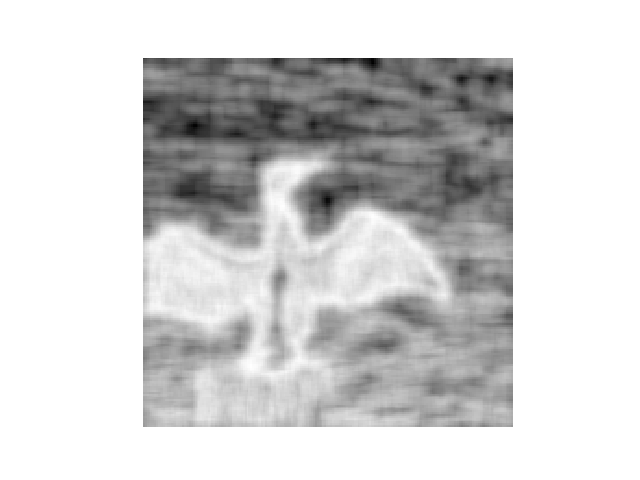

In [16]:
E = tf.entropyfilt(Igray)

plt.figure('entropy filter')
plt.imshow(E, cmap = 'gray')
plt.axis('off')
plt.show()

Rangefilt

<IPython.core.display.Javascript object>


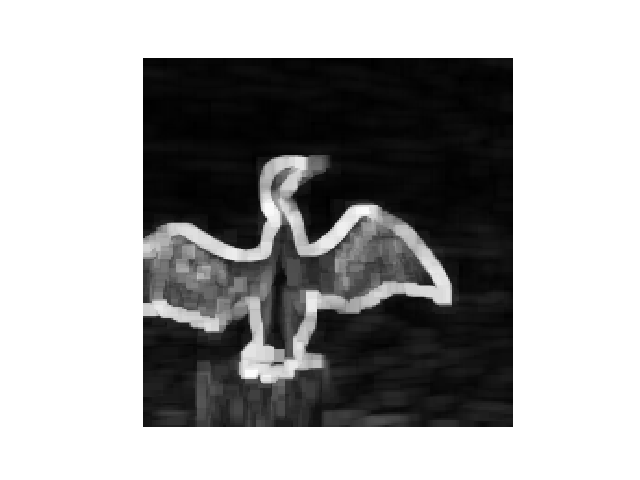

In [18]:
R = tf.rangefilt(Igray)

plt.figure('Range filter')
plt.imshow(R, cmap = 'gray')
plt.axis('off')
plt.show()

Interprete cada una de las imágenes obtenidas conforme al descriptor utilizado. Elija dos de
estos descriptores como características y realice la segmentación considerando el espacio de
características correspondiente. 

<IPython.core.display.Javascript object>


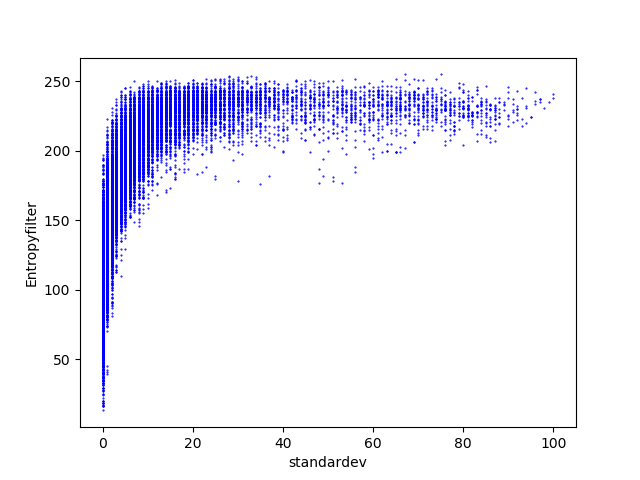

In [19]:
J_res = np.reshape(J, (nrows*ncols,1))

E_res = np.reshape(E, (nrows*ncols,1))

plt.figure('filter scatter')
plt.scatter(J_res, E_res, c='blue', s= 1, marker='.')
plt.xlabel('standardev')
plt.ylabel('Entropyfilter')
plt.show()

[[  2.82080586 167.13641026]
 [  0.45172321 109.536744  ]
 [ 19.26670164 222.92252536]]


<IPython.core.display.Javascript object>


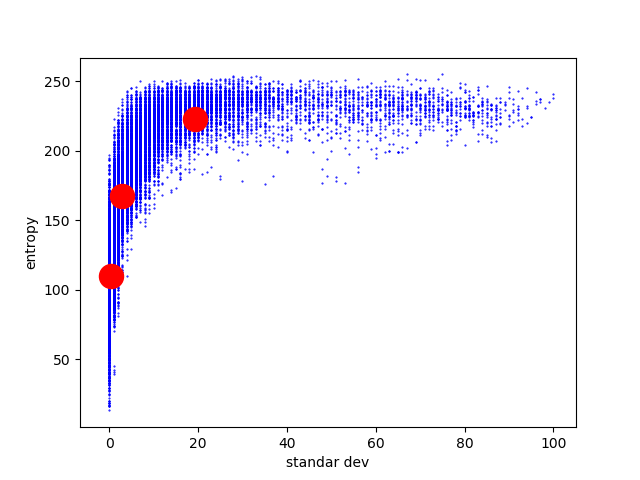

In [20]:
textures_res =np.concatenate((J_res, E_res), axis=1)


kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans3.fit_predict(textures_res)
print(kmeans3.cluster_centers_)


plt.figure('textures scatter + kmeans')
plt.scatter(J_res, E_res, c='blue', s= 1, marker='.')
plt.xlabel('standar dev')
plt.ylabel('entropy')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red')
plt.show()

(40000,)
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


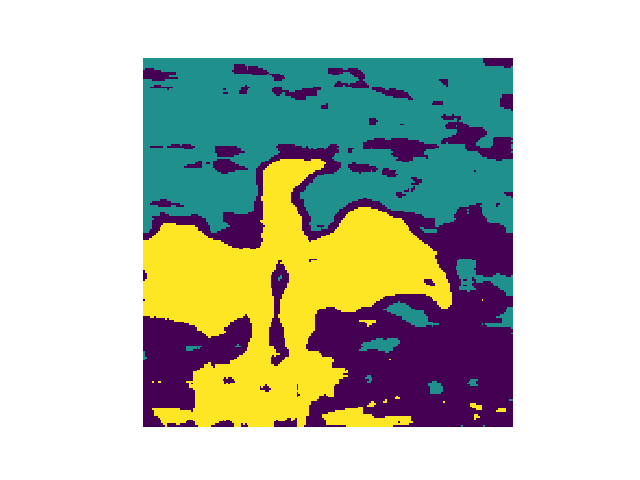

In [21]:
eti_textures =kmeans3.labels_
print(eti_textures.shape)

pixel_labels_textures = np.reshape(eti_textures, (nrows, ncols))
print(pixel_labels_textures)

%matplotlib notebook
plt.figure('textures labeled')
plt.imshow(pixel_labels_textures)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


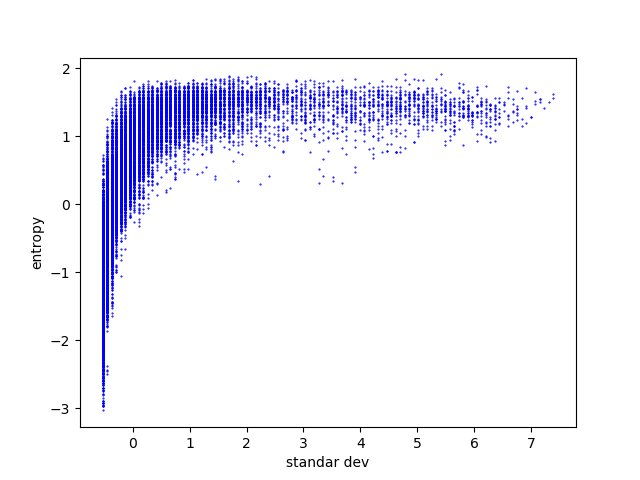

In [22]:
[x, ndim]= textures_res.shape
textures_norm = textures_res
textures_norm = textures_norm.astype(np.float64)
for ind in range (0, ndim):
    datos = textures_res[:,ind]
    datos_norm = (datos- np.mean(datos))/np.std(datos)
    textures_norm[:,ind] = datos_norm
    
J_norm = textures_norm[:, 0]
E_norm = textures_norm[:, 1]

plt.figure('textures scatter norm')
plt.scatter(J_norm, E_norm, c='blue', s= 1, marker='.')
plt.xlabel('standar dev')
plt.ylabel('entropy')
plt.show()

V. Utilización de características de distinta naturaleza
Para mejorar el resultado de la segmentación obtenida en los apartados anteriores, justifique
razonadamente la elección de tres características si se desea utilizar descriptores de distinta
naturaleza (color y textura).
Realice la segmentación de I considerando las tres características seleccionadas (recuerde
utilizar características normalizadas). A la vista de los resultados, indique qué tipo de
características (color, textura), aporta más información para realizar la segmentación de esta
imagen.

<IPython.core.display.Javascript object>


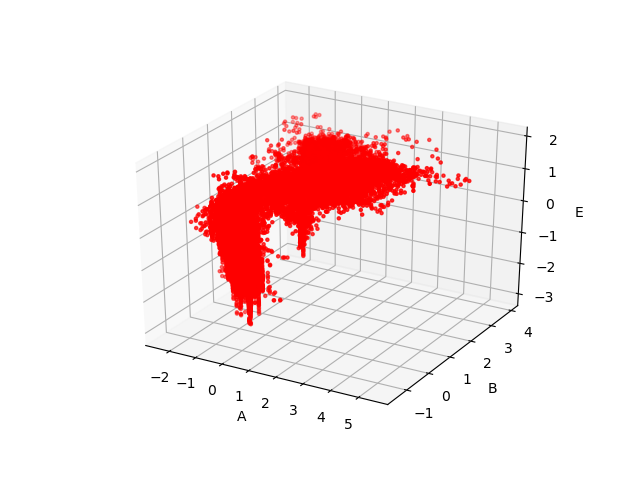

In [23]:
#ABE_res = np.concatenate((L_a_norm, L_b_norm, E_norm),axis=1)

fig = plt.figure('scatter plot ABE')
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(L_a_norm, L_b_norm, E_norm, c='r', marker='.')

ax3.set_xlabel('A')
ax3.set_ylabel('B')
ax3.set_zlabel('E')

plt.show()